In [1]:
import numpy as np

tEgg = 63
tWater = 4

def f(x, y):
    return 27*np.power(x, 2/3)*np.log(0.76*(tEgg-tWater)/(y-tWater))/60

x = np.arange(45, 70, 2)
y = np.arange(8, 16, 0.5)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

In [2]:
import pandas as pd


def formatZ(z):
    minutes, seconds = divmod(int(np.round(z*60)), 60)
    return f"{minutes:02d}:{seconds:02d}"


df = pd.DataFrame(Z, columns=x, index=y)
df.to_csv("egg_time.csv")
df.applymap(lambda x: formatZ(x))

,45,47,49,51,53,55,57,59,61,63,65,67,69
8.0,13:46,14:10,14:34,14:57,15:21,15:44,16:06,16:29,16:51,17:13,17:35,17:56,18:18
8.5,13:05,13:28,13:51,14:14,14:36,14:58,15:19,15:41,16:02,16:23,16:43,17:04,17:24
9.0,12:29,12:51,13:13,13:35,13:56,14:17,14:37,14:58,15:18,15:38,15:58,16:17,16:36
9.5,11:57,12:18,12:39,12:59,13:19,13:39,13:59,14:19,14:38,14:57,15:16,15:35,15:53
10.0,11:27,11:47,12:07,12:27,12:46,13:05,13:24,13:43,14:02,14:20,14:38,14:56,15:14
10.5,11:00,11:19,11:38,11:57,12:16,12:34,12:52,13:10,13:28,13:46,14:03,14:20,14:37
11.0,10:34,10:53,11:11,11:30,11:48,12:05,12:23,12:40,12:57,13:14,13:31,13:47,14:04
11.5,10:11,10:29,10:47,11:04,11:21,11:38,11:55,12:12,12:28,12:44,13:01,13:16,13:32
12.0,09:49,10:06,10:23,10:40,10:57,11:13,11:29,11:45,12:01,12:17,12:32,12:48,13:03
12.5,09:28,09:45,10:01,10:18,10:34,10:49,11:05,11:21,11:36,11:51,12:06,12:21,12:35


Text(0.5, 0.92, '雞蛋冷卻 (雞蛋初始溫度 63°C，水槽溫度 4°C)')

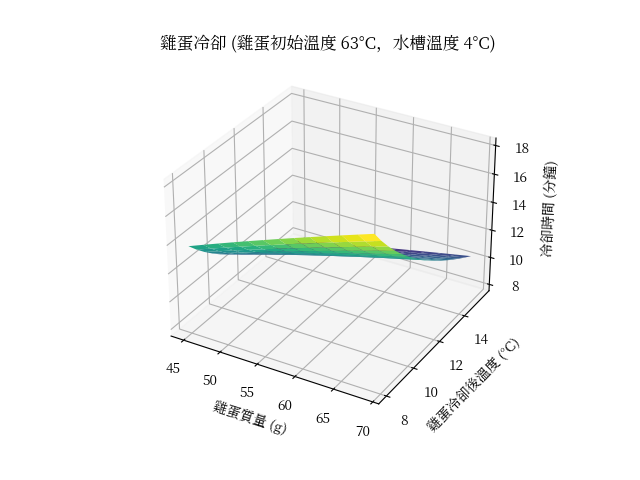

In [3]:
%matplotlib ipympl

import matplotlib
hasNoto = ("Noto Serif CJK JP" in set([f.name for f in matplotlib.font_manager.fontManager.ttflist]))
if hasNoto:
    matplotlib.rc("font", family="Noto Serif CJK JP")
else:
    matplotlib.rc('font', family='Microsoft JhengHei')
import matplotlib.pyplot as plt

plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_xlabel("雞蛋質量 (g)")
ax.set_ylabel("雞蛋冷卻後溫度 (°C)")
ax.set_zlabel("冷卻時間 (分鐘)")
ax.set_title(f'雞蛋冷卻 (雞蛋初始溫度 {tEgg}°C，水槽溫度 {tWater}°C)')